In [ ]:
# look at some datasets

In [1]:
library(ggplot2)
library(dplyr)

In [2]:
gnomad = read.delim('~/Primate_MTG/gnomad.v2.1.1.lof_metrics.by_gene.txt', sep = '\t')
gnomad[1:2,]

gene  transcript      obs_mis exp_mis oe_mis  mu_mis     possible_mis
1 MED13 ENST00000397786 871     1117.8  0.77921 5.5598e-05 14195       
2 NIPBL ENST00000282516 846     1441.5  0.58688 7.3808e-05 18540       
  obs_mis_pphen exp_mis_pphen oe_mis_pphen ⋯ gene_type      gene_length
1 314           529.75        0.59273      ⋯ protein_coding 122678     
2 158           543.10        0.29092      ⋯ protein_coding 189655     
  exac_pLI exac_obs_lof exac_exp_lof exac_oe_lof brain_expression chromosome
1 1        0             64.393      0.0000000   NA               17        
2 1        1            110.570      0.0090443   NA               5         
  start_position end_position
1 60019966       60142643    
2 36876861       37066515

In [38]:
bulkspec = read.delim('~/Primate_MTG/bulk_coexp_spec_cross_species_25.csv', sep = ',')
dim(bulkspec)
bulkspec[1,]
ids = grep('human', colnames(bulkspec))
bulkspec$human_avg = rowMeans(bulkspec[,2:24], na.rm = T)

[1] 14131   301

gene human_chimp human_rhesusm human_crabm human_mouse human_rat human_rabbit
1 A1BG 0.9171331   0.6754909     0.519668    0.3459922   0.432844  0.5321471   
  human_boar human_cow human_dog ⋯ bombyx_yeast bombyx_arabidopsis bombyx_maize
1 0.8450163  0.1639923 0.9315495 ⋯ NA           NA                 NA          
  bombyx_tomato yeast_arabidopsis yeast_maize yeast_tomato arabidopsis_maize
1 NA            NA                NA          NA           NA               
  arabidopsis_tomato maize_tomato
1 NA                 NA

In [39]:
colnames(bulkspec)[2:14]

[1] "human_chimp"   "human_rhesusm" "human_crabm"   "human_mouse"  
 [5] "human_rat"     "human_rabbit"  "human_boar"    "human_cow"    
 [9] "human_dog"     "human_horse"   "human_goat"    "human_sheep"  
[13] "human_chicken"

In [17]:
spes = c('mouse_to_human', 'human_to_chicken', 'human_to_lizard', 'turtle_to_human')
tab0 = c()

for(ii in 1:4){
    temp = read.delim(paste0('reciprocal_hits/', spes[ii], '.reciprocal_closest_hits.csv'), sep = ',')
    tab0 = rbind(tab0, temp[,c('human', 'distance')])
}
tab1 = tab0 %>% group_by(human) %>% reframe(dist = mean(distance, na.rm = T))

In [40]:
tab1$spec = bulkspec$human_avg[match(tab1$human, bulkspec$gene)]
dim(tab1)
tab1[1:3,]

[1] 17402     3

human dist      spec     
1 A1BG  10.432987 0.6392933
2 A1CF   2.983047 0.9394894
3 A2M    4.451061        NA

In [41]:
tab1[tab1[,1]=='GLUL',]

human dist     spec     
1 GLUL  4.049058 0.9281306

In [42]:
cor(tab1$dist, tab1$spec, use = 'pairwise.complete.obs', method = 'spearman')

[1] -0.1110156

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 3989 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 3989 rows containing missing values or values outside the scale range
(`geom_point()`).”


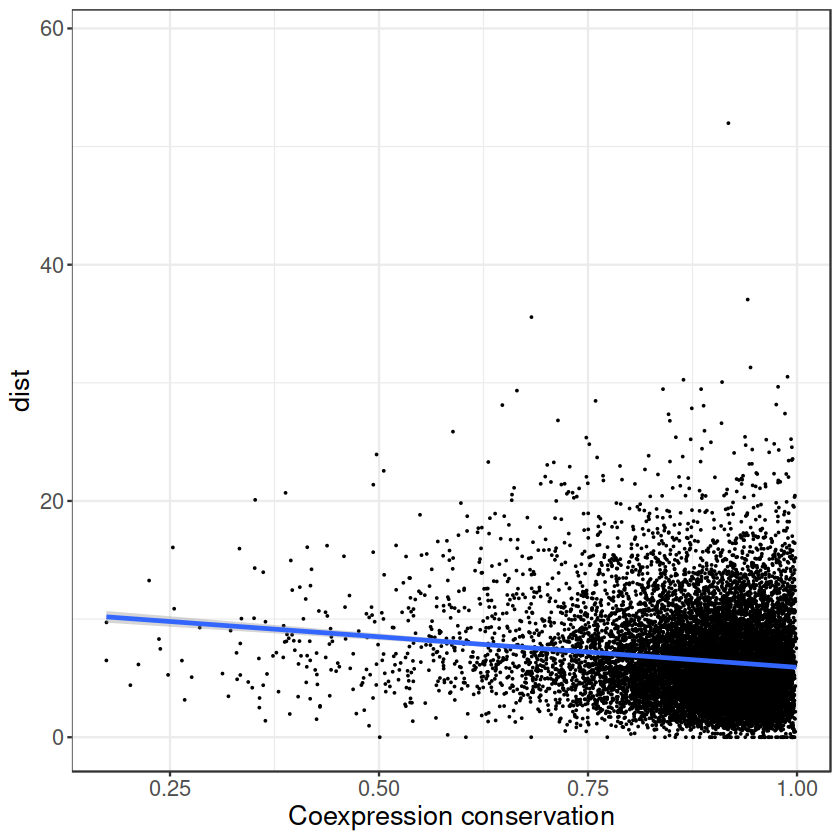

In [47]:
# png('aa-1.png', width = 5, height = 5, res = 300, units = 'in')
ggplot(tab1, aes(x = spec, y = dist)) + geom_point(size = 0.01) +
geom_smooth(method = 'lm') + theme_bw() +
xlab('Coexpression conservation') + theme(text = element_text(size = 16)) 
# dev.off()

In [44]:
tab1$pLI = gnomad$exac_pLI[match(tab1$human, gnomad$gene)]

In [45]:
tab1$lof = 'low'
tab1$lof[which(tab1$pLI>0.9 & !is.na(tab1$pLI))] = 'high'

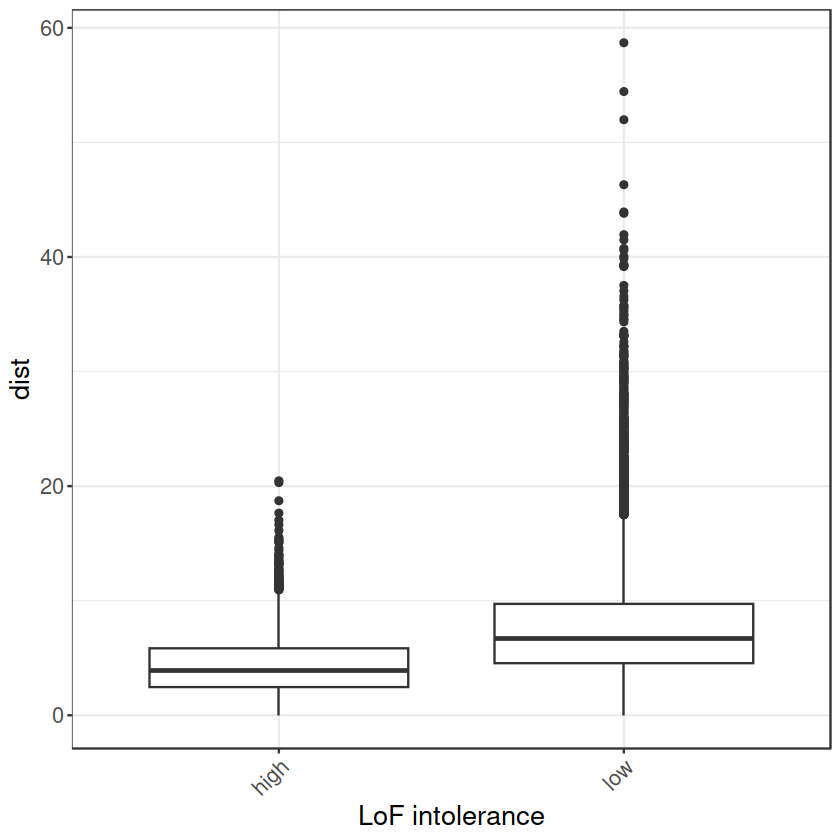

In [48]:
# png('aa-2.png', width = 4, height = 5, res = 300, units = 'in')
ggplot(tab1, aes(x = lof, y = dist)) + geom_boxplot() +
theme_bw() + xlab('LoF intolerance') + 
theme(text = element_text(size = 16), axis.text.x = element_text(angle = 45, hjust = 1)) 
# dev.off()

In [51]:
# cell types
ctypes = c('LV_vCM', 'RV_vCM', 'aCM', 'immature_CM', 'endocardial', 'epicardial',
                'mes_progenitor', 'fibroblast', 'SMC', 'neural_crest', 'blood', 'macrophage')

In [54]:
t1 = read.delim('~/septation/cardoso_moreira_S2_expressolog.txt', sep ='\t')
t1[1,]

Human.ID        Gene.symbol WGNA.module Disease Number.systems System
1 ENSG00000000003 TSPAN6      M23         Not_DM  NA             NA    
  Number.of.organs.with.dynamic.expression Organ.specificity
1 4                                        0.08661762       
  Organ.of..maximum.expression Brain.time.specificity ⋯ WGCNA.module.color
1 Kidney                       0.4578233              ⋯ royalblue         
  chicken_gene turtle_gene lizard_gene turtle_lizard chicken_lizard
1 TSPAN6       TSPAN6      TSPAN6      0.7796995     0.9053606     
  chicken_turtle avg_expressolog Disease2    Organ2
1 0.9245937      0.8698846       Non_disease Other

In [53]:
# get orthologs
om = read.delim('~/septation/turtle/turtle_chicken_orthologs_biomart.txt', sep = '\t')
om <- om[which(om[,1]!='' & om[,2]!='' & !is.na(om[,5]) & om[,5]==1 & om[,4]=='ortholog_one2one'),]

# om = read.delim('lizard/lizard_turtle_orthologs_eggNOG.txt', sep = '\t')
# om <- om[which(!is.na(om$lizard_gene) & !is.na(om$ortholog_name)),]
# om <- om[,c('lizard_gene', 'ortholog_name')]
dim(om)
om[1,]

[1] 11275     5

Gene.name Chicken.gene.name Last.common.ancestor.with.Chicken
10 ND2       ND2               Archelosauria                    
   Chicken.homology.type Chicken.orthology.confidence..0.low..1.high.
10 ortholog_one2one      1

In [50]:
# shared vs specific markers?
df1 = read.delim('~/septation/chicken/chicken_celltype_markers.csv', sep = ',')
df2 = read.delim('~/septation/turtle/turtle_celltype_markers.csv', sep = ',')

In [57]:
# embeddings
tab2 = read.delim('reciprocal_hits/turtle_to_chicken.reciprocal_closest_hits.csv', sep = ',')
tab2[1:2,]

chicken turtle distance
1 5-MCDG  TDG    7.274066
2 A1CF    A1CF   2.813624

In [56]:
newdf2 = c()

for(ii in 1:length(ctypes)){
    ctype = ctypes[ii]
    g1 = df1$gene[df1$cluster==ctype]
    g2 = df2$gene[df2$cluster==ctype]
    
    # g1 <- om$lizard_gene[match(g1, om$ortholog_name)]
    g1 <- om[match(g1, om[,2]),1]
    g1 <- g1[!is.na(g1)]

    common_genes = intersect(g1, g2)
    all_genes = union(g1, g2)
    diff_genes = setdiff(all_genes, common_genes)

    temp1 = data.frame(celltype = ctype, gene = common_genes, gtype = 'common', 
                       score = t1$avg_expressolog[match(common_genes, t1$turtle_gene)])
    temp2 = data.frame(celltype = ctype, gene = diff_genes, gtype = 'different', 
                       score = t1$avg_expressolog[match(diff_genes, t1$turtle_gene)])
    newdf2 = rbind(newdf2, temp1, temp2)
}

newdf2[1:2,]

celltype gene  gtype  score    
1 LV_vCM   HHLA2 common 0.8758450
2 LV_vCM   LDB3  common 0.9161751

In [58]:
newdf2$dist = tab2$distance[match(newdf2$gene, tab2$turtle)]

In [59]:
newdf2$celltype = factor(newdf2$celltype, levels = ctypes)

In [65]:
wilcox.test(newdf2$dist[newdf2$gtype=='common'], newdf2$dist[newdf2$gtype!='common'], alternative = 'less')


	Wilcoxon rank sum test with continuity correction

data:  newdf2$dist[newdf2$gtype == "common"] and newdf2$dist[newdf2$gtype != "common"]
W = 179840612, p-value < 2.2e-16
alternative hypothesis: true location shift is less than 0


Warning message:
“Removed 31615 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


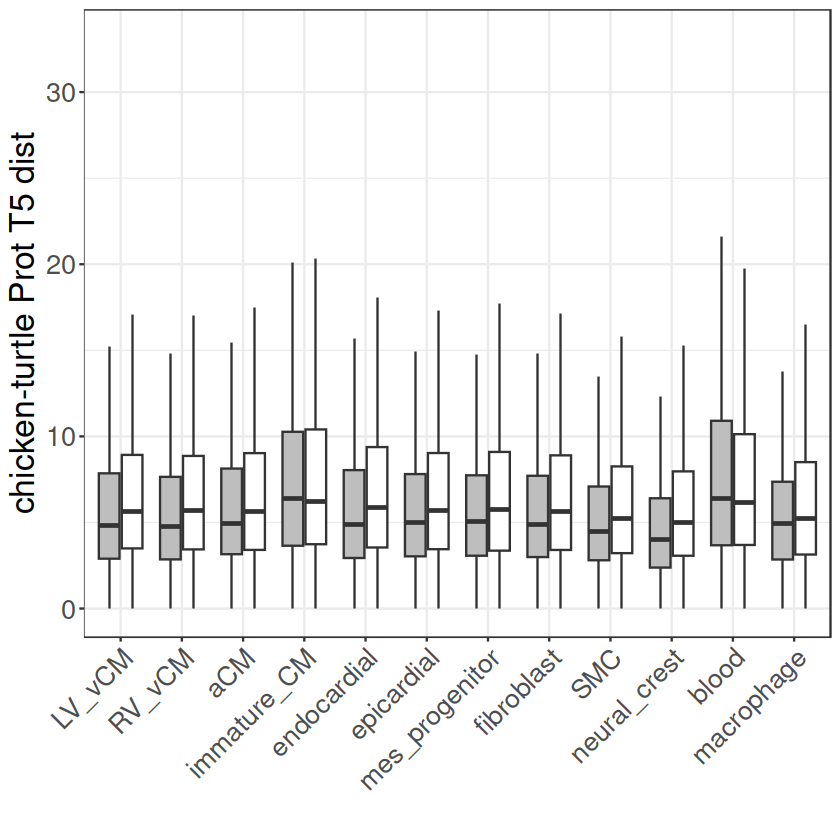

In [63]:
# png('aa-c-t-dist.png', width = 6, height = 5, res = 300, units = 'in')
ggplot(newdf2, aes(x = celltype, y = dist, fill = gtype)) + geom_boxplot(outlier.shape = NA) +
theme_bw() + scale_fill_manual(values = c('#bebebe', 'white')) + theme(legend.position = 'none') +
theme(text = element_text(size = 20), axis.text.x = element_text(angle = 45, hjust = 1)) +
xlab('') + ylab('chicken-turtle Prot T5 dist')
# dev.off()

In [66]:
t1$dist = tab1$dist[match(t1$Gene.symbol, tab1$human)]
t1[1,]

Human.ID        Gene.symbol WGNA.module Disease Number.systems System
1 ENSG00000000003 TSPAN6      M23         Not_DM  NA             NA    
  Number.of.organs.with.dynamic.expression Organ.specificity
1 4                                        0.08661762       
  Organ.of..maximum.expression Brain.time.specificity ⋯ chicken_gene
1 Kidney                       0.4578233              ⋯ TSPAN6      
  turtle_gene lizard_gene turtle_lizard chicken_lizard chicken_turtle
1 TSPAN6      TSPAN6      0.7796995     0.9053606      0.9245937     
  avg_expressolog Disease2    Organ2 dist    
1 0.8698846       Non_disease Other  3.904673

In [83]:
plotdf = data.frame(group1 = t1$dist, group2 = t1$Disease2)
plotdf <- plotdf[!is.na(plotdf$group1) & !is.na(plotdf$group2),]

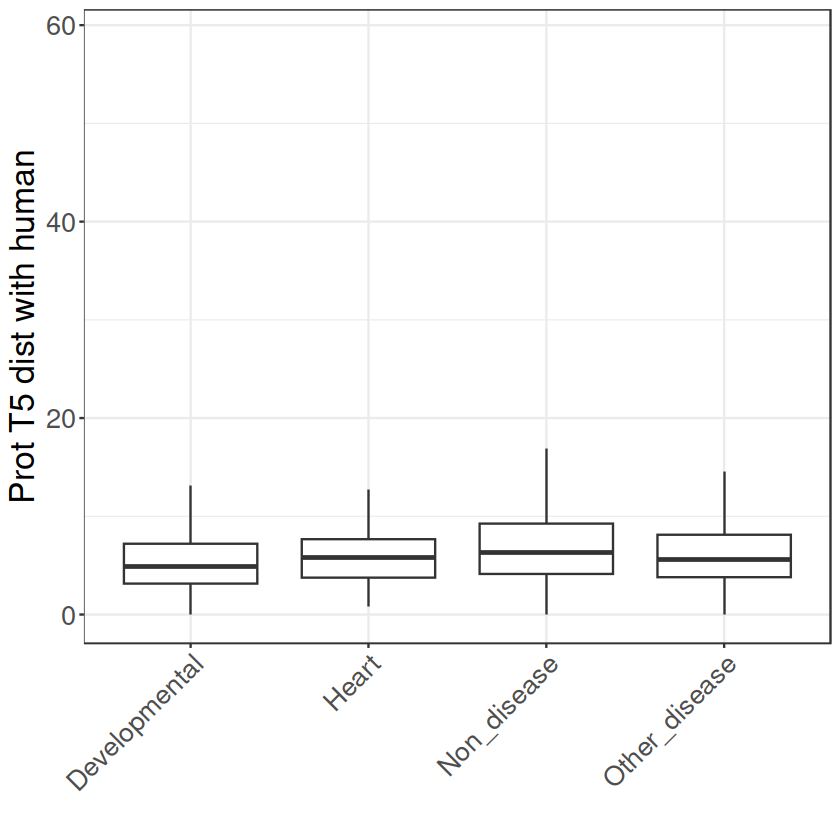

In [84]:
ggplot(plotdf, aes(x = as.factor(group2), y = group1)) + geom_boxplot(outlier.shape = NA) +
theme_bw() + theme(text = element_text(size = 20), axis.text.x = element_text(angle = 45, hjust = 1)) +
ylab('Prot T5 dist with human') + xlab('')

In [88]:
m1 = read.delim('~/septation/turtle/turtle_stage_markers.csv', sep = ',')
m1[1,]

p_val avg_log2FC pct.1 pct.2 p_val_adj cluster gene        
1 0     1.92272    0.958 0.514 0         stage14 LOC101933106

In [89]:
m1$dist = tab1$dist[match(m1$gene, tab1$human)]

Warning message:
“Removed 4232 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


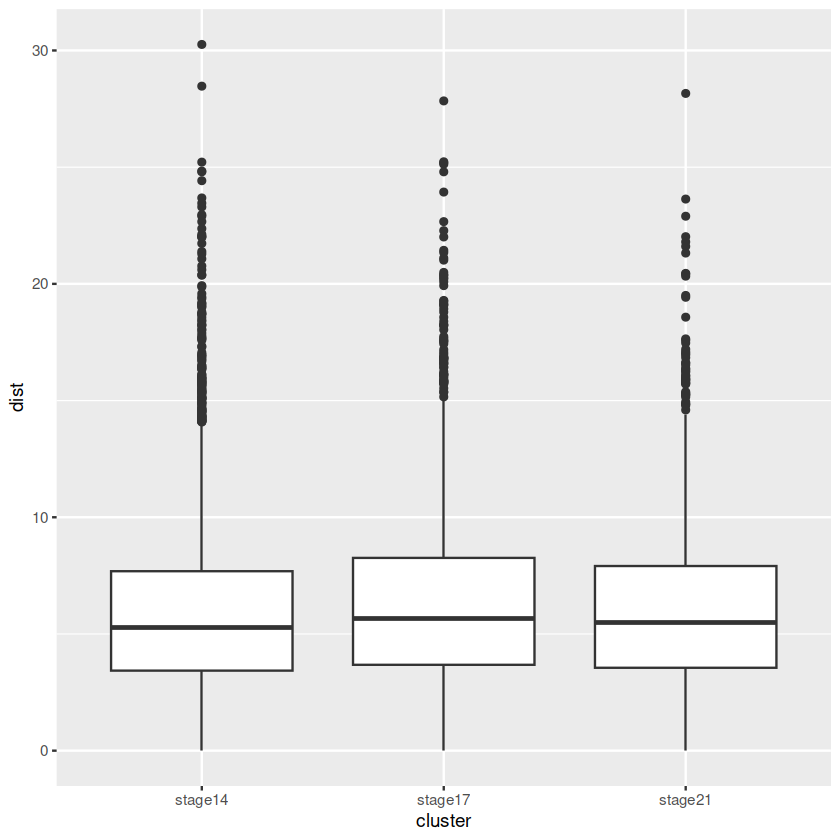

In [90]:
ggplot(m1, aes(cluster, dist)) + geom_boxplot()